<a href="https://www.kaggle.com/code/ashrafkhetran/mpg-dataset-eda-notebook?scriptVersionId=289557331" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 1. Introduction by Muhammad Ashraf Khetran, PhD Scholar. 
The MPG dataset (Miles per Gallon) is a classic dataset containing information about cars from the late 1970s and early 1980s. It includes fuel efficiency (mpg), engine size, weight, acceleration, model year, origin, and more.
This notebook explores the dataset through composition, distribution, comparison, and relationships.

# 2. Load Data

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Theme
sns.set_theme(style="whitegrid", context="notebook")
plt.rcParams["figure.dpi"] = 120

# Load MPG dataset
mpg = sns.load_dataset("mpg")

# Basic info
print(mpg.shape)
mpg.head()


(398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


# 3. Composition

/tmp/ipykernel_17/982246595.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=mpg, x="origin", palette="Set2")


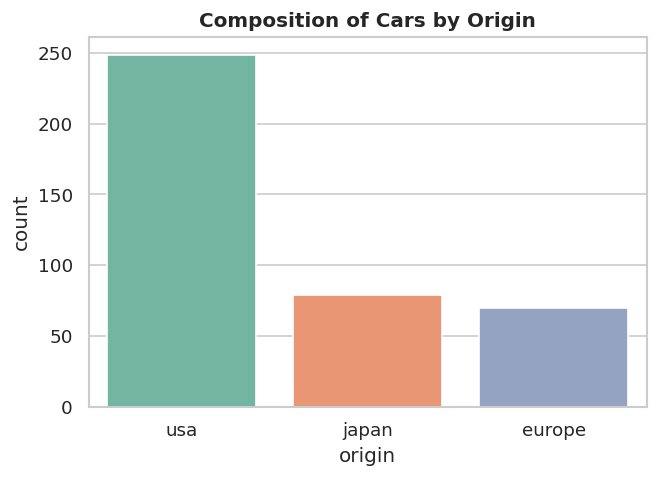

origin
usa       249
japan      79
europe     70
Name: count, dtype: int64

In [2]:
# Count by origin
origin_counts = mpg["origin"].value_counts()

plt.figure(figsize=(6,4))
sns.countplot(data=mpg, x="origin", palette="Set2")
plt.title("Composition of Cars by Origin", fontsize=12, weight="bold")
plt.show()

origin_counts


# 4. Distribution

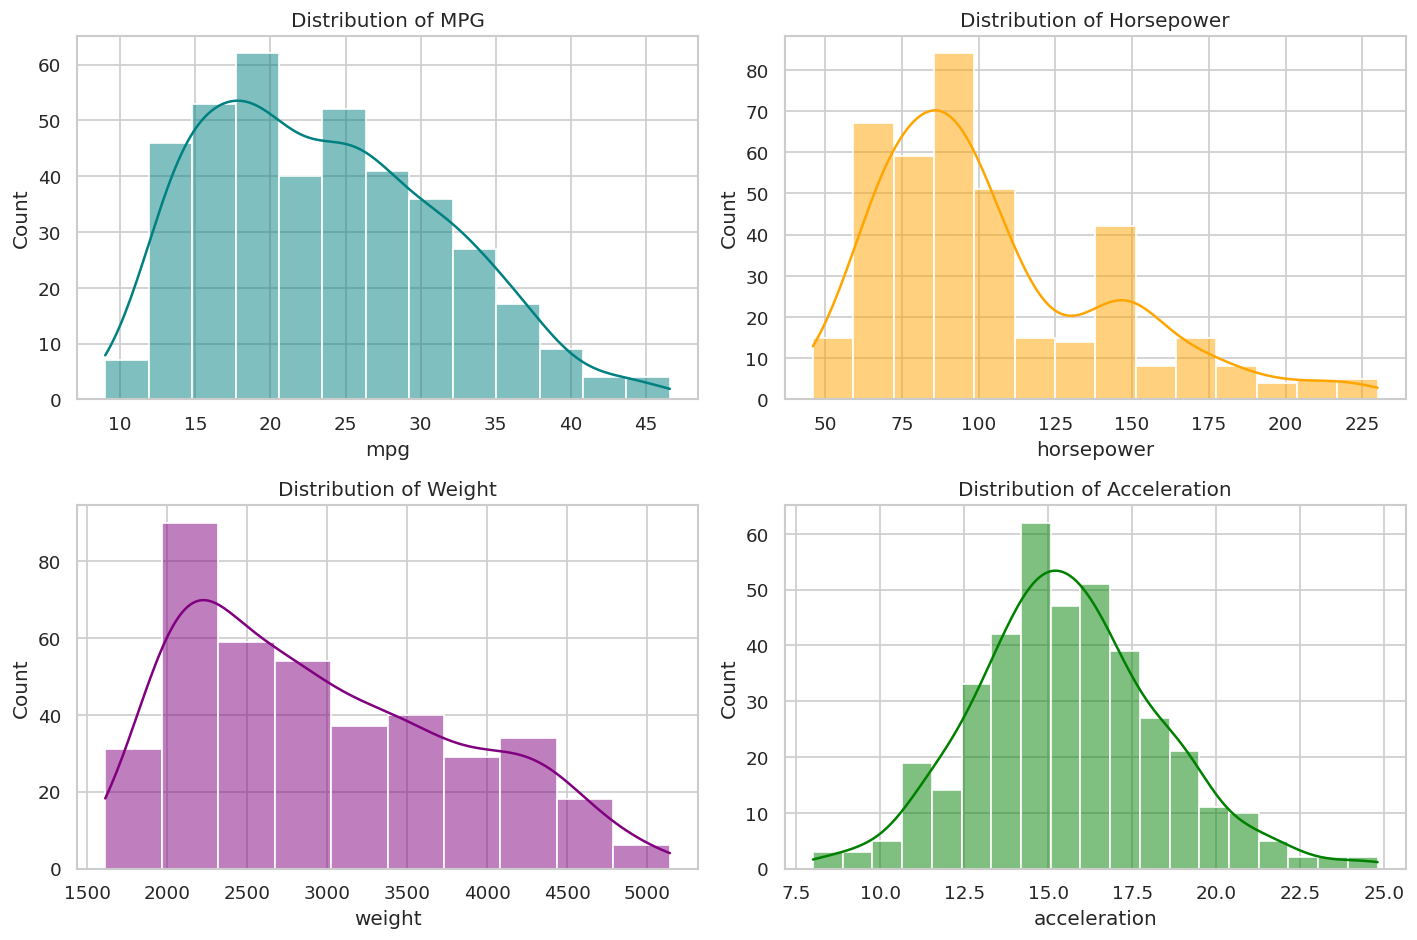

In [3]:
fig, axes = plt.subplots(2, 2, figsize=(12,8))

sns.histplot(mpg["mpg"].dropna(), kde=True, ax=axes[0,0], color="teal")
axes[0,0].set_title("Distribution of MPG")

sns.histplot(mpg["horsepower"].dropna(), kde=True, ax=axes[0,1], color="orange")
axes[0,1].set_title("Distribution of Horsepower")

sns.histplot(mpg["weight"].dropna(), kde=True, ax=axes[1,0], color="purple")
axes[1,0].set_title("Distribution of Weight")

sns.histplot(mpg["acceleration"].dropna(), kde=True, ax=axes[1,1], color="green")
axes[1,1].set_title("Distribution of Acceleration")

plt.tight_layout()
plt.show()


# 5. Comparison

/tmp/ipykernel_17/2534281523.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mpg, x="origin", y="mpg", ax=axes[0], palette="Set2")
/tmp/ipykernel_17/2534281523.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=mpg, x="origin", y="horsepower", ax=axes[1], palette="Set2")


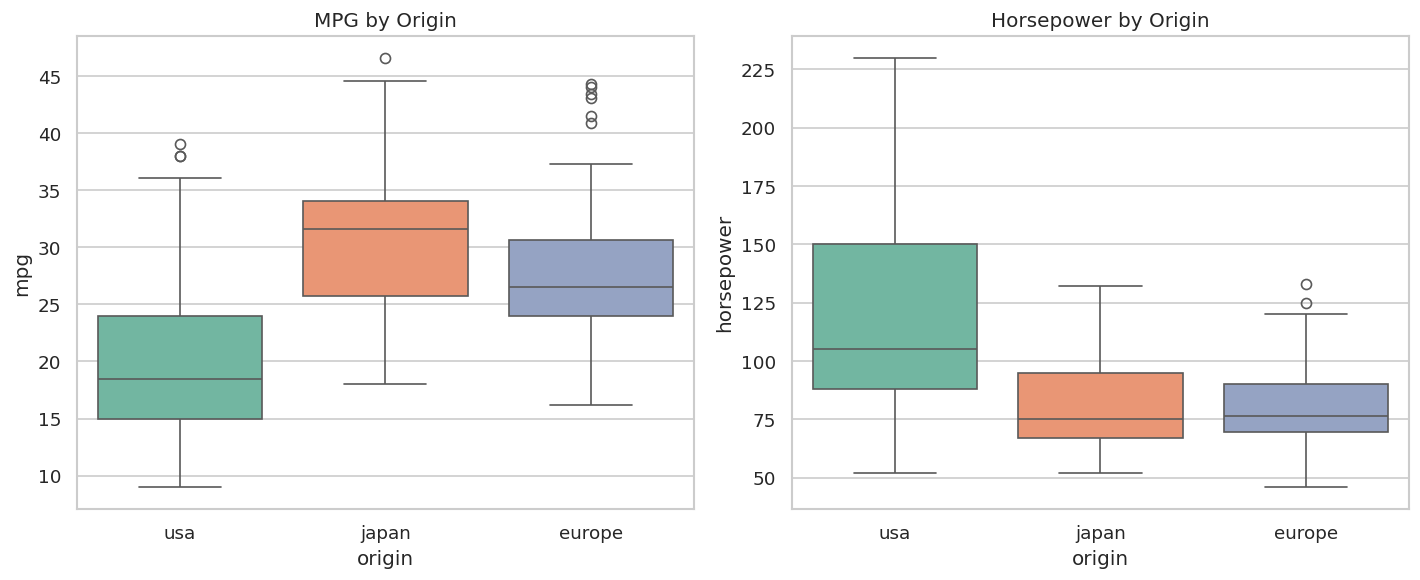

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.boxplot(data=mpg, x="origin", y="mpg", ax=axes[0], palette="Set2")
axes[0].set_title("MPG by Origin")

sns.boxplot(data=mpg, x="origin", y="horsepower", ax=axes[1], palette="Set2")
axes[1].set_title("Horsepower by Origin")

plt.tight_layout()
plt.show()


# 6. Relationships

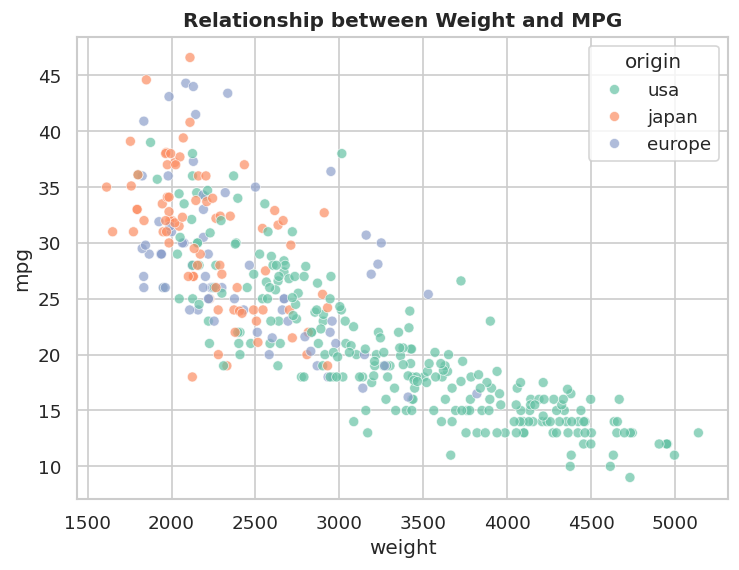

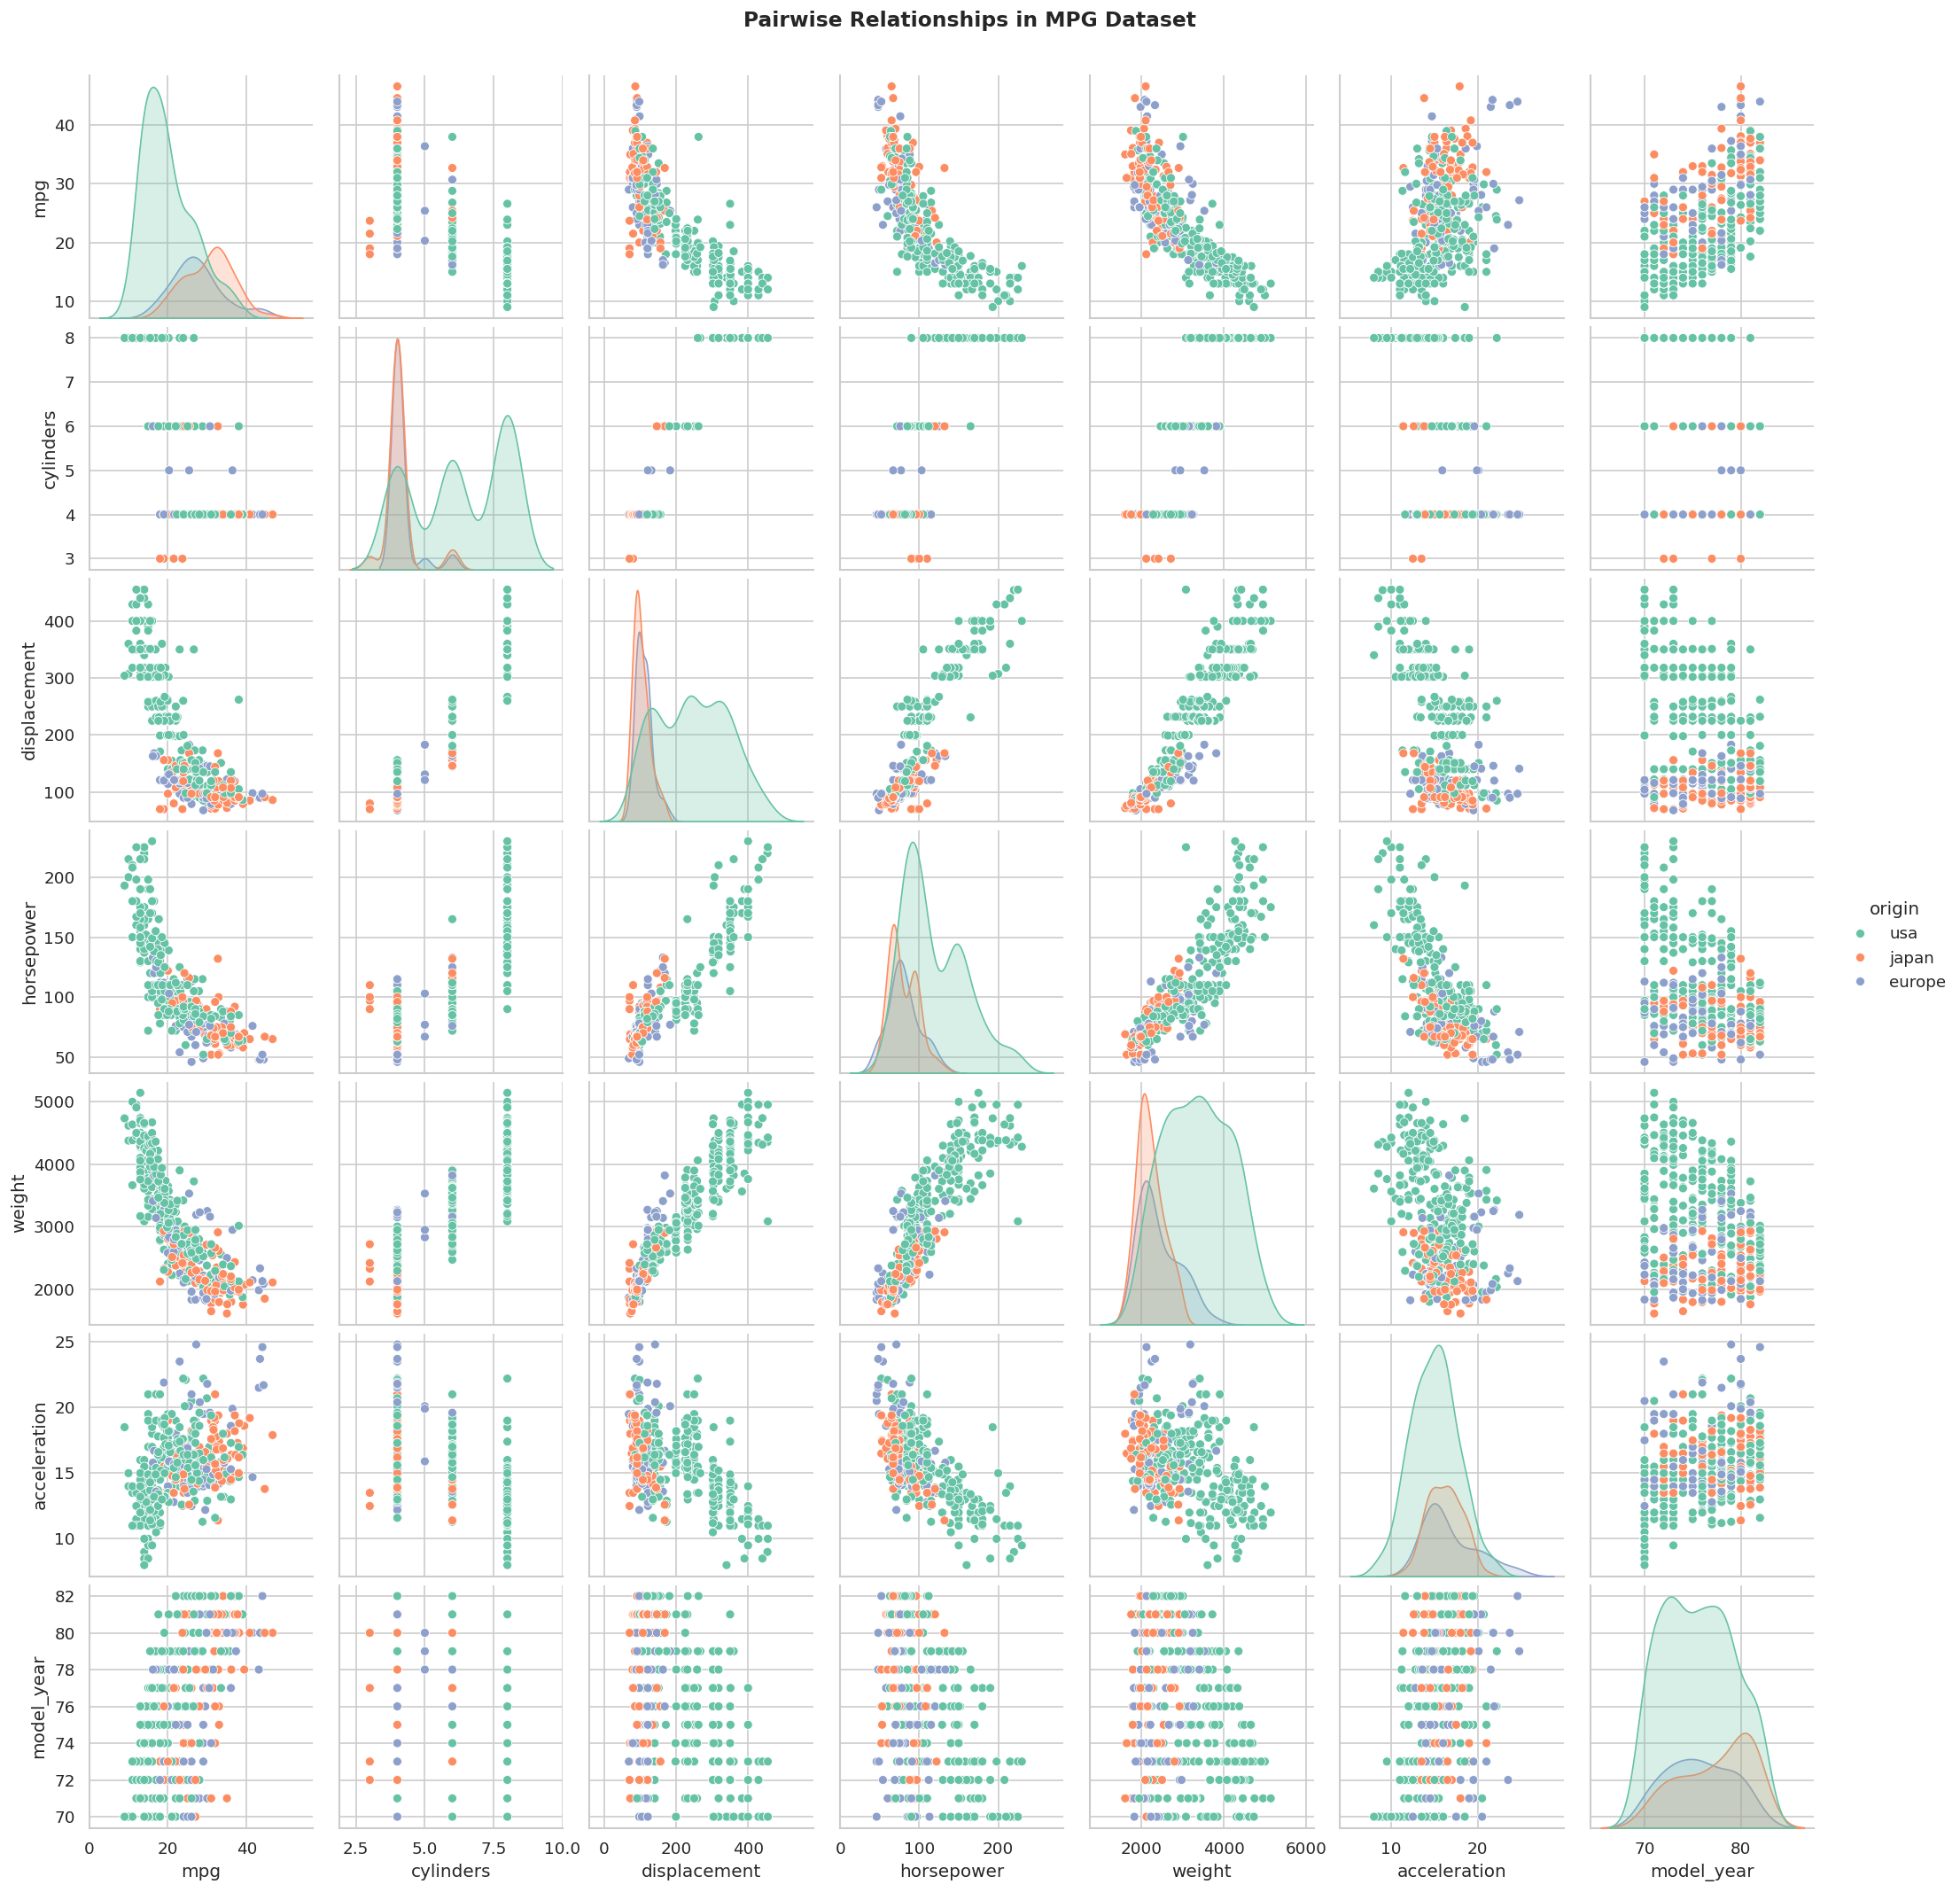

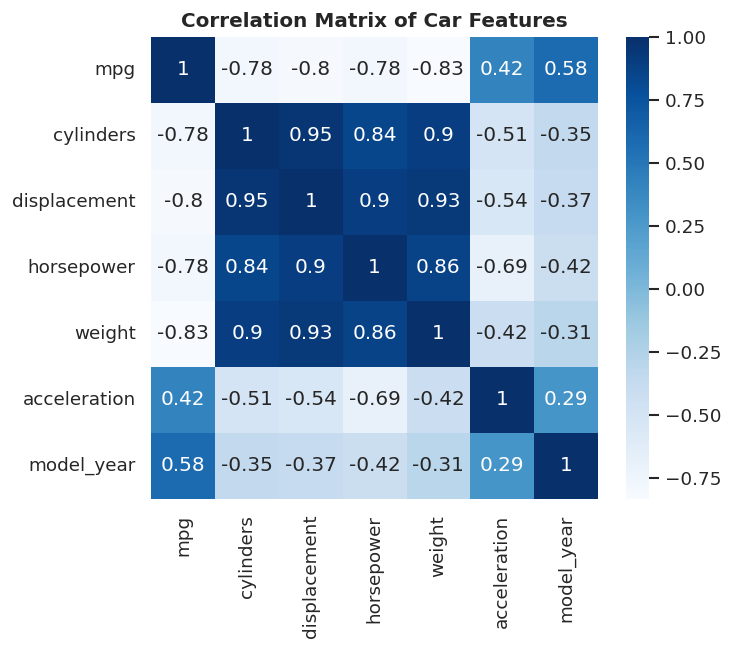

In [5]:
# MPG vs weight
plt.figure(figsize=(7,5))
sns.scatterplot(data=mpg, x="weight", y="mpg", hue="origin", palette="Set2", alpha=0.7)
plt.title("Relationship between Weight and MPG", fontsize=12, weight="bold")
plt.show()

# Pairplot for numeric features
sns.pairplot(mpg.dropna(), hue="origin", palette="Set2", diag_kind="kde")
plt.suptitle("Pairwise Relationships in MPG Dataset", y=1.02, fontsize=14, weight="bold")
plt.show()

# Correlation heatmap
plt.figure(figsize=(6,5))
sns.heatmap(mpg.drop(columns=["name","origin"]).corr(), annot=True, cmap="Blues")
plt.title("Correlation Matrix of Car Features", fontsize=12, weight="bold")
plt.show()


# 7. Summary
Composition: Cars mainly from USA, with fewer from Europe and Japan.

Distribution: MPG skewed toward moderate values; horsepower and weight highlight heavier cars.

Comparison: Japanese cars more efficient; USA cars more powerful but less efficient.

Relationships: Strong negative correlation between weight/horsepower and MPG; origin explains clustering.